<a href="https://colab.research.google.com/github/ananddiv/datascience/blob/main/Data_preperation_and_Poly_Reg_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#For Installing new packages

Datasets Used: housing.csv, position_salaries.csv

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score,RepeatedKFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [3]:
df = pd.read_csv('position_salaries.csv')

In [4]:
df.shape

(10, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [6]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


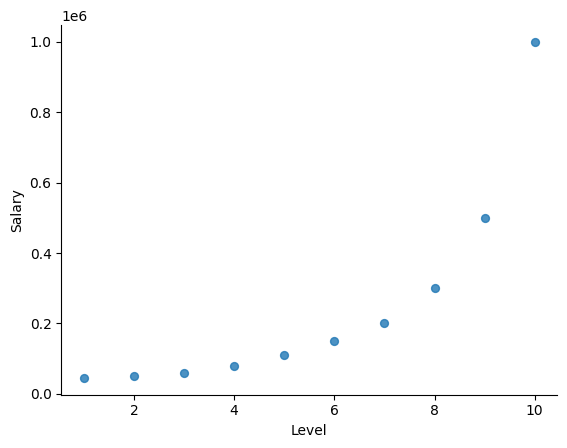

In [8]:
# @title Level vs Salary

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Level', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

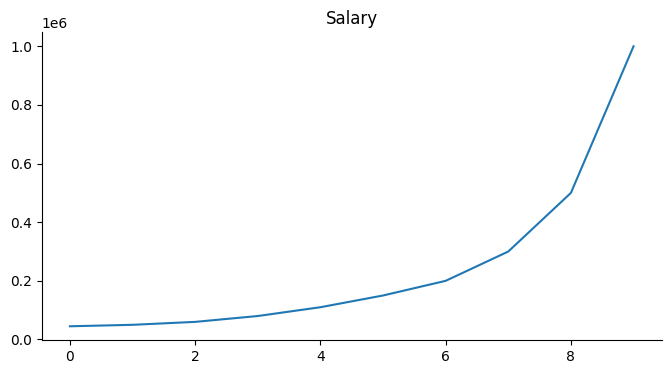

In [7]:
# @title Salary

from matplotlib import pyplot as plt
df['Salary'].plot(kind='line', figsize=(8, 4), title='Salary')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='Level', ylabel='Salary'>

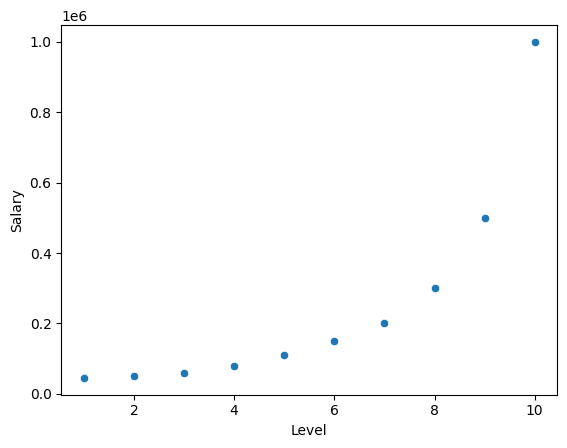

In [10]:
sns.scatterplot(x=df['Level'], y=df['Salary'])

In [32]:
X=df['Level'].values.reshape(-1,1)
y=df['Salary'].values

In [33]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [16]:
#X_train, y_train, X_test, y_test = train_test_split(X,y,train_size=0.33,random_state=42)

In [21]:
model = LinearRegression()

In [34]:
model.fit(X,y)

LinearRegression()

In [35]:
preds = model.predict(X)

In [39]:
preds

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

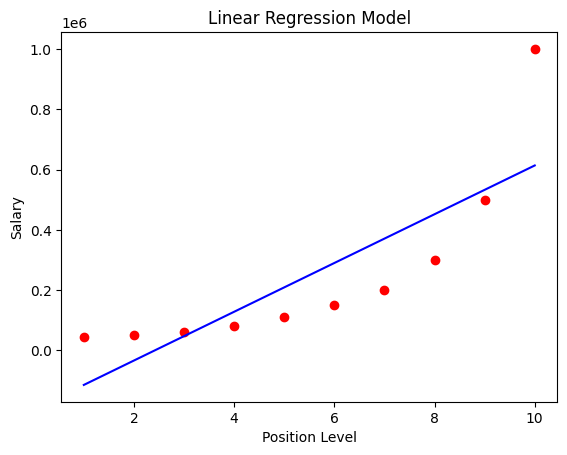

In [38]:
plt.scatter(X,y, color = 'red')
plt.plot(X,preds, color = 'blue')
plt.title('Linear Regression Model')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [40]:
residuals = y-preds

In [41]:
residuals

array([ 159454.54545455,   83575.75757576,   12696.96969697,
        -48181.81818182,  -99060.60606061, -139939.39393939,
       -170818.18181818, -151696.96969697,  -32575.75757576,
        386545.45454545])

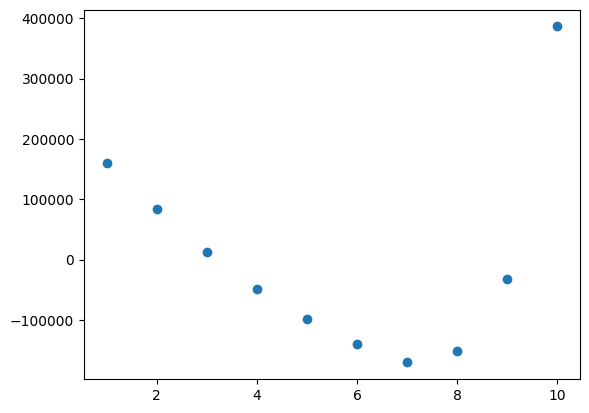

In [43]:
plt.scatter(np.arange(1,len(preds)+1),residuals)

<Axes: >

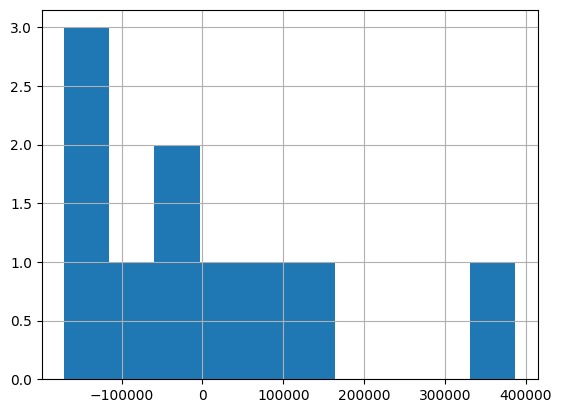

In [46]:
pd.Series(residuals).hist()

Residuals are not normally distributed

In [73]:
poly_feature_model = PolynomialFeatures(degree=4)

In [67]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [74]:
poly_X = poly_feature_model.fit_transform(X)

In [59]:
poly_X

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [69]:
model_poly_reg = LinearRegression()
model_poly_reg.fit(poly_X,y)

LinearRegression()

In [70]:
poly_preds = model_poly_reg.predict(poly_X)

In [71]:
poly_preds

array([ 53356.64335675,  31759.90675984,  58642.1911421 ,  94632.86713282,
       121724.94172495, 143275.05827509, 184003.49650352, 289994.17249417,
       528694.63869462, 988916.08391612])

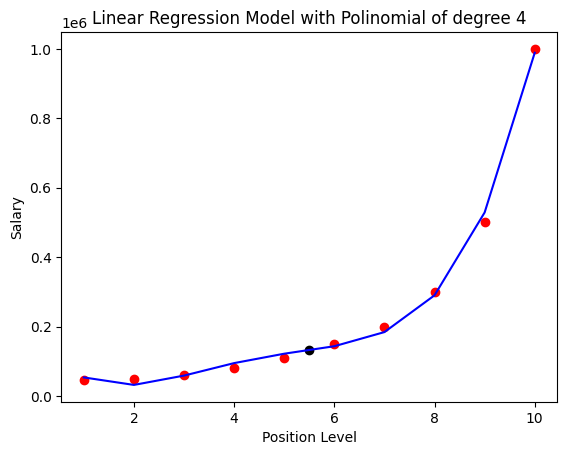

In [86]:
plt.scatter(X,y, color = 'red')
plt.plot(X,poly_preds, color = 'blue')
plt.scatter(5.5,new_value_predict, color = 'black')
plt.title('Linear Regression Model with Polinomial of degree 4')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [79]:
#Predict for value 5.5
val = 5.5
new_value_transformed = poly_feature_model.fit_transform(np.array(val).reshape(-1,1))

In [80]:
new_value_transformed

array([[  1.    ,   5.5   ,  30.25  , 166.375 , 915.0625]])

In [82]:
new_value_predict = model_poly_reg.predict(new_value_transformed)

Create a function for prediction

In [88]:
def make_transform_predction(poly_feature_model, model_poly_reg,value):
  value_transformed = poly_feature_model.fit_transform(np.array(val).reshape(-1,1))
  return(model_poly_reg.predict(new_value_transformed))

In [89]:
make_transform_predction(poly_feature_model,model_poly_reg,5.5)

array([132148.43750002])

Ridge Regression
 Dataset: housing.csv

In [92]:
df1 = pd.read_csv('housing.csv')

In [93]:
df1.shape

(506, 14)

In [94]:
df1.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [95]:
df1[' CHAS'].value_counts()

0    471
1     35
Name:  CHAS, dtype: int64

In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1    ZN       506 non-null    float64
 2    INDUS    506 non-null    float64
 3    CHAS     506 non-null    int64  
 4    NOX      506 non-null    float64
 5    RM       506 non-null    float64
 6    AGE      506 non-null    float64
 7    DIS      506 non-null    float64
 8    RAD      506 non-null    int64  
 9    TAX      506 non-null    float64
 10   PTRATIO  506 non-null    float64
 11   B        506 non-null    float64
 12   LSTAT    506 non-null    float64
 13  MEDV      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [99]:
df1.columns

Index(['CRIM', ' ZN', ' INDUS', ' CHAS', ' NOX', ' RM', ' AGE', ' DIS', ' RAD',
       ' TAX', ' PTRATIO', ' B', ' LSTAT', 'MEDV'],
      dtype='object')

In [97]:
X = df1.drop(['MEDV'],axis=1)
y = df1['MEDV']

In [102]:
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=42,train_size = 0.80)

In [117]:
model_ridge = Ridge(alpha=.3)

In [118]:
model_ridge.fit(X_train,y_train)

Ridge(alpha=0.3)

In [119]:
model_ridge.intercept_

27.959941444774703

In [120]:
model_ridge.coef_

array([-1.11352783e-01,  3.10286814e-02,  2.60531613e-02,  2.69191282e+00,
       -1.38634794e+01,  4.45542186e+00, -8.91583594e-03, -1.40020034e+00,
        2.56269364e-01, -1.09981209e-02, -8.77211005e-01,  1.24793530e-02,
       -5.14786271e-01])

In [121]:
model_ridge.score(X_train,y_train)

0.7504875947861684

In [122]:
preds_ridge = model_ridge.predict(X_test)

In [123]:
ridge_res = preds_ridge-y_test

In [124]:
ridge_res

173     5.261794
274     3.492196
491     0.927818
72      2.119949
452     2.822771
         ...    
412   -18.515183
436     4.274544
411    -1.360534
86     -0.309852
75      2.806820
Name: MEDV, Length: 102, dtype: float64

In [125]:
mean_squared_error(y_test,preds_ridge)

24.335741332759618

In [126]:
np.sqrt(mean_squared_error(y_test,preds_ridge))

4.933126932561093

In [132]:
def regression_results(y_true, y_pred):
  mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred)
  mse=metrics.mean_squared_error(y_true, y_pred)
  median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
  r2=metrics.r2_score(y_true, y_pred)
  # print('explained_variance: ', round(explained_variance,4))
  print('r2: ', round(r2,4))
  print('MAE: ', round(mean_absolute_error,4))
  print('MSE: ', round(mse,4))
  print('RMSE: ', round(np.sqrt(mse),4))

In [133]:
regression_results(y_test,preds_ridge)

r2:  0.6682
MAE:  3.1622
MSE:  24.3357
RMSE:  4.9331


Lasso Regression
Dataset: Hitters.csv

In [134]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

In [135]:
df = pd.read_csv('Hitters.csv')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

In [137]:
df['Salary'].fillna(df['Salary'].median(skipna=True),inplace=True)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      322 non-null    f

In [139]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']], drop_first=True)
y = df['Salary']
x_ = df.drop(['Unnamed: 0', 'Salary', 'League', 'Division', 'NewLeague'], axis =1).astype('float64')
X = pd.concat([x_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis =1)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

In [141]:
lasso = Lasso(alpha=0.5,max_iter = 10_000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.5, max_iter=10000)

In [143]:
preds = lasso.predict(X_test)

In [144]:
regression_results(y_test,preds)

r2:  0.3661
MAE:  240.6993
MSE:  119382.7033
RMSE:  345.518
